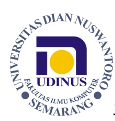

## UAS AMS
**Nama: Aldriansyah Yustino**

**NIM:A11.2019.12140**

**Kelas: A12.6501**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


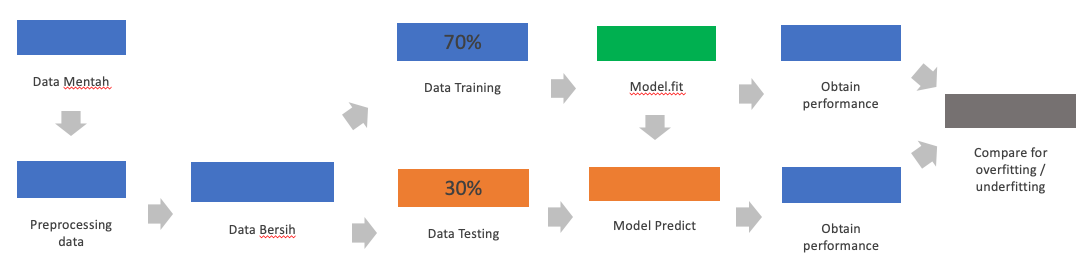

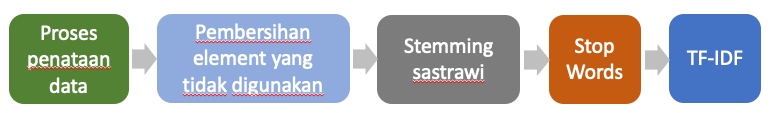

In [21]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import ekphrasis
import pandas as pd
import time
import tweepy
import numpy as np


In [23]:
df = pd.read_csv('Dataset_Sentimen_Emosi.csv')

In [24]:
df = df.drop(['Sentimen'], axis=1)

In [25]:
df.head()

,Tweet,Emosi
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1
3,Covid belum nyampe prigen mbak hmm hoax,-2
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   904 non-null    object
 1   Emosi   904 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


In [27]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [28]:

def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')


In [29]:
bersih_data('text')
non_ascii('text')

'text'

In [30]:
i = 0
final_string = []
s = ""
for text in df['Tweet'].values:
    EachReviewText = ""
    filteredSentence = []
    proc = bersih_data(text)
    #     dst
    #     dst
    #     dst
    EachReviewText = proc
    final_string.append(EachReviewText)

In [31]:
df["step01"] = final_string

In [32]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1,"cegah mata rantai covid - <number> , mari kita..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1,aku mohon yaallah semoga wabah covid - <number...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2,"nyuruh orang pintar , lu aja togog . itu kerum..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1,pikir2 balik byk mnde plk nk setelkn lepas cov...
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1,"selamat pagi , hari jum ' at . jum ' at keempa..."
7,"Hikmah di balik musibah covid-19, smg para pej...",-2,"hikmah di balik musibah covid - <number> , smg..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1,cegah covid - <number> beserta jajaran polsek ...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1,ya allah kami memohon pada mu perkenankanlah d...


In [33]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [34]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 78 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1 non-null      object
 1   Emosi   1 non-null      int64 
 2   step01  1 non-null      object
dtypes: int64(1), object(2)
memory usage: 32.0+ bytes


In [45]:
df_hapus.head(10)

,Tweet,Emosi,step01
78,covid,1,covid


In [44]:
df_new = df[~df.isin(df_hapus)].dropna()

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   903 non-null    object 
 1   Emosi   903 non-null    float64
 2   step01  903 non-null    object 
dtypes: float64(1), object(2)
memory usage: 28.2+ KB


In [46]:
df_new

,Tweet,Emosi,step01
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,"cegah mata rantai covid - <number> , mari kita..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid - <number...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,"nyuruh orang pintar , lu aja togog . itu kerum..."
...,...,...,...
899,Seluruh negara di dunia mengalami masa sulit k...,-2.0,seluruh negara di dunia mengalami masa sulit k...
900,"Setelah covid dan skripsi disaster selesai, ma...",2.0,"setelah covid dan skripsi disaster selesai , m..."
901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",1.0,"malam ini ! ! projek "" benda boleh bincang "" <..."
902,Pontang - panting di koyak covid 19,-2.0,pontang - panting di koyak covid <number>


In [47]:
import nltk
from nltk.tokenize import word_tokenize 


In [48]:
def word_tokenize_wrapper(text):
  nltk.download('punkt')
  return word_tokenize(text)

In [49]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[

In [42]:
df_new.head(10)

,Tweet,Emosi,step01,tokens
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,..."
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga..."
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]"
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas cov...,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l..."
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,"selamat pagi , hari jum ' at . jum ' at keempa...","[selamat, pagi, ,, hari, jum, ', at, ., jum, '..."
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,"hikmah di balik musibah covid - <number> , smg...","[hikmah, di, balik, musibah, covid, -, <, numb..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid - <number> beserta jajaran polsek ...,"[cegah, covid, -, <, number, >, beserta, jajar..."
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank..."


In [50]:
normalized_word = pd.read_csv('kamus perbaikan kata.csv',encoding = 'unicode_escape',sep='delimiter')
### dst

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [51]:
normalized_word = pd.read_excel("kamus perbaikan kata.csv")

In [52]:
normalized_word_dict = {}

In [53]:
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

In [54]:
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [55]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [56]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [57]:

df_new["step02"] = final_string_tokens

In [58]:
#### Sampai tahap ini didaparkan kolom baru untuk Kolom `final_token` `dan step02`

In [59]:
df_new.head(10)

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ...","[cegah, mata, rantai, covid, -, <, number, >, ...","cegah mata rantai covid - < number > , mari ki..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,...","[aku, mohon, yaallah, semoga, wabah, covid, -,...",aku mohon yaallah semoga wabah covid - < numbe...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ...","[nyuruh, orang, pintar, ,, kamu, saja, togog, ...","nyuruh orang pintar , kamu saja togog . itu ke..."
5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,1.0,pikir2 balik byk mnde plk nk setelkn lepas cov...,"[pikir2, balik, byk, mnde, plk, nk, setelkn, l...","[pikir2, balik, banyak, mnde, plk, nk, setelkn...",pikir2 balik banyak mnde plk nk setelkn lepas ...
6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",-1.0,"selamat pagi , hari jum ' at . jum ' at keempa...","[selamat, pagi, ,, hari, jum, ', at, ., jum, '...","[selamat, pagi, ,, hari, jum, ', at, ., jum, '...","selamat pagi , hari jum ' at . jum ' at keempa..."
7,"Hikmah di balik musibah covid-19, smg para pej...",-2.0,"hikmah di balik musibah covid - <number> , smg...","[hikmah, di, balik, musibah, covid, -, <, numb...","[hikmah, di, balik, musibah, covid, -, <, numb...","hikmah di balik musibah covid - < number > , s..."
8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid - <number> beserta jajaran polsek ...,"[cegah, covid, -, <, number, >, beserta, jajar...","[cegah, covid, -, <, number, >, beserta, jajar...",cegah covid - < number > beserta jajaran polse...
9,Ya Allah kami memohon pada mu perkenankanlah d...,-1.0,ya allah kami memohon pada mu perkenankanlah d...,"[ya, allah, kami, memohon, pada, mu, perkenank...","[iya, allah, kami, memohon, pada, mu, perkenan...",iya allah kami memohon pada mu perkenankanlah ...


**simpan file terlebih dahulu**

In [60]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

**Steamming dengan Sastrawi**

In [61]:
import pandas as pd

In [62]:
dataset = pd.read_csv('clean_dataset_uts_part01.csv', sep=';')

In [63]:
dataset.head()

,Unnamed: 0,Tweet,Emosi,step01,tokens,final_tokens,step02
0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,"cegah mata rantai covid - <number> , mari kita...","['cegah', 'mata', 'rantai', 'covid', '-', '<',...","['cegah', 'mata', 'rantai', 'covid', '-', '<',...","cegah mata rantai covid - < number > , mari ki..."
1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid - <number...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid - < numbe...
2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...
3,3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak aduh bohong
4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","['nyuruh', 'orang', 'pintar', ',', 'lu', 'aja'...","['nyuruh', 'orang', 'pintar', ',', 'kamu', 'sa...","nyuruh orang pintar , kamu saja togog . itu ke..."


In [64]:
!pip install PySastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 5.6 MB/s eta 0:00:00


In [65]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [66]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
### Tuliskan perintahnya disini ???

stopwords_sastrawi = factory.create_stop_word_remover()

In [67]:
df_new['step02'] = df_new['step02'].apply(str)

In [68]:
df_new.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ...","[cegah, mata, rantai, covid, -, <, number, >, ...","cegah mata rantai covid - < number > , mari ki..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,...","[aku, mohon, yaallah, semoga, wabah, covid, -,...",aku mohon yaallah semoga wabah covid - < numbe...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ...","[nyuruh, orang, pintar, ,, kamu, saja, togog, ...","nyuruh orang pintar , kamu saja togog . itu ke..."


In [69]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [70]:

df_new.loc[:, ('ProcessedText')] = final_string

In [71]:
df_new.head()

,Tweet,Emosi,step01,tokens,final_tokens,step02,ProcessedText
0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,"cegah mata rantai covid - <number> , mari kita...","[cegah, mata, rantai, covid, -, <, number, >, ...","[cegah, mata, rantai, covid, -, <, number, >, ...","cegah mata rantai covid - < number > , mari ki...",cegah rantai covid - number mari rumah minggu
1,aku mohon yaAllah semoga wabah covid-19 menghi...,-1.0,aku mohon yaallah semoga wabah covid - <number...,"[aku, mohon, yaallah, semoga, wabah, covid, -,...","[aku, mohon, yaallah, semoga, wabah, covid, -,...",aku mohon yaallah semoga wabah covid - < numbe...,yaallah moga wabah covid - number hilang ramadhan
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"[pemprov, papua, naikkan, status, jadi, tangga...","[pemprov, papua, naikkan, status, jadi, tangga...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status tanggap darurat covi...
3,Covid belum nyampe prigen mbak hmm hoax,-2.0,covid belum nyampe prigen mbak hmm hoax,"[covid, belum, nyampe, prigen, mbak, hmm, hoax]","[covid, belum, nyampe, prigen, mbak, aduh, boh...",covid belum nyampe prigen mbak aduh bohong,covid nyampe prigen mbak aduh bohong
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-2.0,"nyuruh orang pintar , lu aja togog . itu kerum...","[nyuruh, orang, pintar, ,, lu, aja, togog, ., ...","[nyuruh, orang, pintar, ,, kamu, saja, togog, ...","nyuruh orang pintar , kamu saja togog . itu ke...",nyuruh pintar togog kerumun nularin covid numb...


# Simpan file untuk jaga jaga

In [72]:
df_new.to_csv('clean_dataset_uas_part02.xlsx',sep=";")

penutup bagian preprocessing data

Mulai Modelling

bagi menjadi feature dan label

In [73]:
dataset_feature = df_new['ProcessedText']

In [74]:
dataset_label = df_new['Emosi']

# Cek Distribusi Data

In [75]:
dataset_label.value_counts()

 1.0    300
-1.0    245
-2.0    201
 2.0    157
Name: Emosi, dtype: int64

In [76]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 1.0    33.2%
-1.0    27.1%
-2.0    22.3%
 2.0    17.4%
Name: Emosi, dtype: object

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 864x576 with 0 Axes>

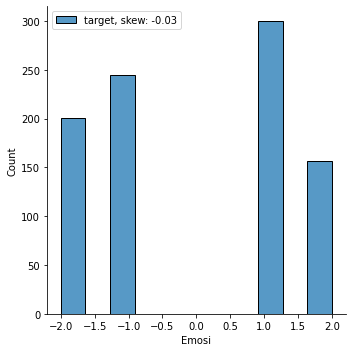

In [78]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

**pada data yang saya pakai dapat kita lihat pada proses distribusi data pada dataset ini menghasilkan 300 dan 150 orang untuk parameter 1&2(positif) sedangkan 200 dan 250 orang untuk parameter -1 dan -2,5 (negatif)**

## Fitur Ekstrasi Menggunakan TF-IDF

cek emosi

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
vectorizer = TfidfVectorizer()

In [105]:
positive_low_reviews = df_new[(df_new["Emosi"] == 1)]
negative_low_reviews = df_new[(df_new["Emosi"] == -1)]
positive_high_reviews = df_new[(df_new["Emosi"] == 2)]
negative_high_reviews = df_new[(df_new["Emosi"] == -2)]

cek emosi positif low

In [106]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [107]:
Positive_1_tf_idf.shape

(300, 4388)

In [108]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('covid', 7.976469502589806)
('number', 7.806318481416106)
('covid number', 7.777686668741779)
('sebar', 6.184710033361751)
('cegah', 6.164090746159015)
('virus', 6.099552225021444)
('rumah', 5.69408711691328)
('corona', 5.511765560119326)
('sebar covid', 5.47094356559907)
('jaga', 5.383932188609441)
('perintah', 5.337412172974547)
('virus covid', 5.288622008805115)
('masyarakat', 5.237328714417565)
('sebar virus', 5.237328714417565)
('sehat', 5.237328714417565)
('virus corona', 5.237328714417565)
('date', 5.183261493147289)
('iya', 5.183261493147289)
('tangan', 5.183261493147289)
('cegah covid', 5.12610307930734)
('cegah sebar', 5.12610307930734)
('corona covid', 5.12610307930734)
('number number', 5.12610307930734)
('warga', 5.12610307930734)
('indonesia', 5.065478457490905)
('pasien', 5.065478457490905)
('kabupaten', 5.000939936353334)
('dampak', 4.9319470648663835)
('kait', 4.9319470648663835)
('masker', 4.9319470648663835)
('pakai', 4.9319470648663835)
('pandemi', 4.93194706486638

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [110]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

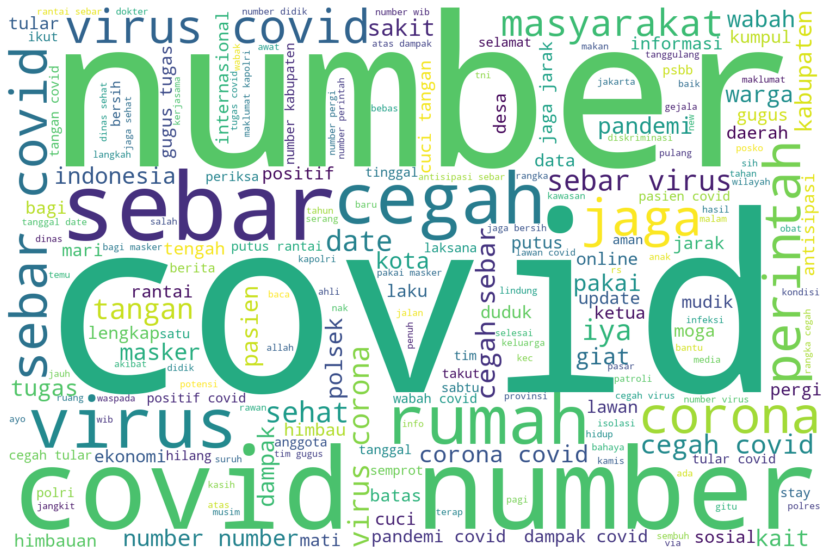

In [111]:
PlotWordCloud(d)


Cek emosi untuk Semua label

jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data df_new["Emosi"]

In [112]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [113]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [114]:
Data_TFIDF.shape

(903, 11629)

In [115]:
(100, 1162)

(100, 1162)

**Training dan Testing dibagi menjadi 70 - 30**

dengan 70 untuk data training dan 30 untuk data testing

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [117]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)


In [118]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape


((632,), (271,), (632,), (271,))

In [119]:
((70,), (30,), (70,), (30,))

((70,), (30,), (70,), (30,))

Model - Naive Bayes

In [120]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [121]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [122]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

In [123]:
## Berapa nilai Accuracy Training set dan Test Set ?
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.865506329113924
Accuracy Test set:  0.4280442804428044


In [124]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.865506329113924
Recall Test set:  0.4280442804428044


In [125]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.8886285726044069
Precision Test set:  0.4857623809232946


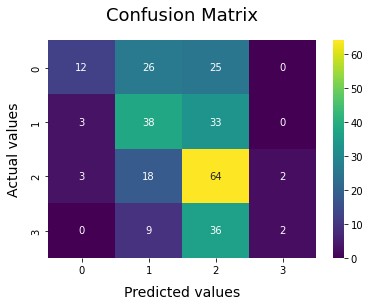

In [126]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [127]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [128]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.865506,0.428044


In [129]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [130]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.428044,0.428044,0.485762


In [131]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.428044,0.428044,0.485762


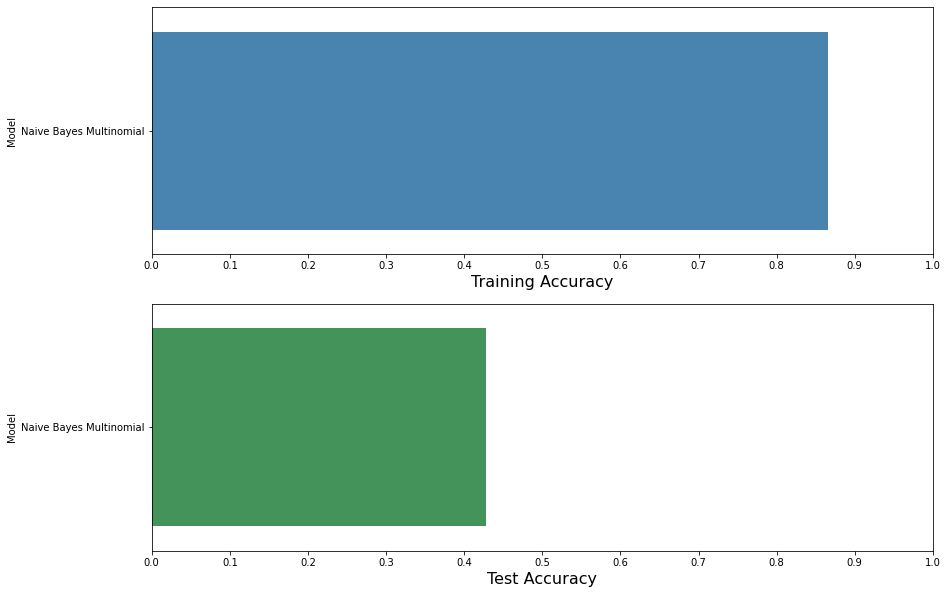

In [132]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

**KESIMPULAN**

dari hasil pengujian stemming dan stopworld dapat kita lihat bahwa nilai training memliki nilai akurasi yang cukup tinggi yaitu 0,9,dan nilai akurasi tes memiliki yang lumayan kecil yaitu 0,45.